In [20]:
import numpy as np
import matplotlib.pyplot as plt

In [21]:
def noise(data):
    noise = np.random.normal(0, np.abs(0.01 * data), size=data.shape)#noise=0; 0.01; 0.005; 0.0025
    noisy_data = data + noise
    return noisy_data

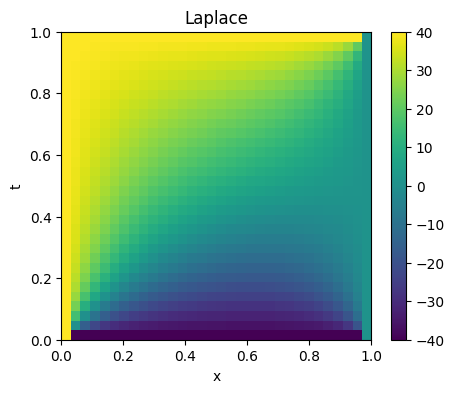

In [12]:
#уравнение Лапласа с граничными условиями 
def laplace_equation_solver(grid_size=32, tolerance=1e-4):
    u = np.zeros((grid_size, grid_size))
    
    u[0,:] = 40
    u[-1,:] = -40
    u[:,0] = 40
    u[:,-1] = 1
    
    converged = False
    while not converged:
        previous_u = np.copy(u)

        for i in range(1, grid_size-1):
            for j in range(1, grid_size-1):
                u[i,j] = 0.25 * (u[i-1,j] + u[i+1,j] + u[i,j-1] + u[i,j+1])
        #гран условия
        u[0,:] = 40
        u[-1,:] = -40
        u[:,0] = 40
        u[:,-1] = 1
        if np.max(np.abs(u - previous_u)) < tolerance:
            converged = True
    
    return u

u = laplace_equation_solver()

dx = 1 / 32
dy = 1 / 32

u = noise(u)
x = np.linspace(0, 1, 32)
y = np.linspace(0, 1, 32)
X, Y = np.meshgrid(x, y)

plt.figure(figsize=(5, 4))
plt.imshow(u, aspect='auto', extent=[np.min(x), np.max(x),np.min(y), np.max(y)], cmap='viridis')
plt.colorbar()
plt.title('Laplace')
plt.xlabel('x')
plt.ylabel('t')
plt.show()


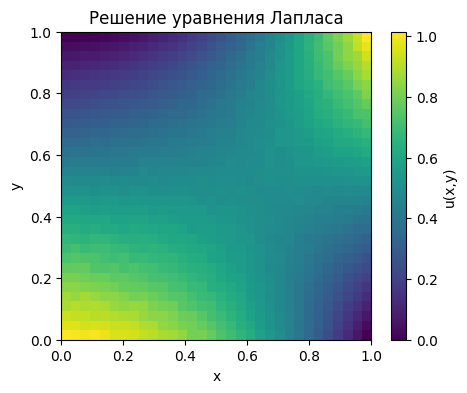

In [22]:
import numpy as np
import matplotlib.pyplot as plt


Lx = 1.0
Ly = 1.0
Nx = 32  
Ny = 32 
dx = Lx / (Nx - 1)
dy = Ly / (Ny - 1)

u = np.zeros((Ny, Nx))

# Граничные условия
# x = 0
for j in range(Ny):
    u[j, 0] = j * dy  # u(0, y) = y

# x = 1
for j in range(Ny):
    u[j, -1] = 1 - j * dy  # u(1, y) = 1 - y

# y = 0
for i in range(Nx):
    u[0, i] = (i * dx) ** 2  # u(x, 0) = x^2

# y = 1
for i in range(Nx):
    u[-1, i] = 1 - (i * dx) ** 2  # u(x, 1) = 1 - x^2

tolerance = 1e-5
error = 1.0

while error > tolerance:
    error = 0.0
    for j in range(1, Ny - 1):
        for i in range(1, Nx - 1):
            u_new = 0.25 * (u[j + 1, i] + u[j - 1, i] + u[j, i + 1] + u[j, i - 1])
            error = max(error, abs(u_new - u[j, i]))
            u[j, i] = u_new

u = noise(u)
plt.figure(figsize=(5, 4))
plt.imshow(u, aspect='auto',extent=[0, Lx, 0, Ly], cmap='viridis')
plt.colorbar(label='u(x,y)')
plt.title('Решение уравнения Лапласа')
plt.xlabel('x')
plt.ylabel('y')
plt.show()


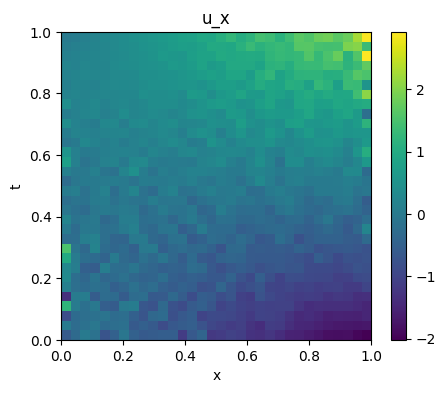

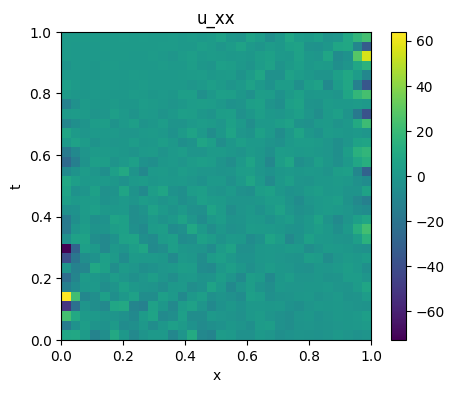

In [23]:
u_x = np.gradient(u, dx, axis=1, edge_order=2)# по x
u_xx = np.gradient(u_x, dx, axis=1, edge_order=2)# по xx

plt.figure(figsize=(5, 4))
plt.imshow(u_x, aspect='auto', extent=[0,1,0, 1], cmap='viridis')
plt.colorbar()
plt.title('u_x')
plt.xlabel('x')
plt.ylabel('t')
plt.show()

plt.figure(figsize=(5, 4))
plt.imshow(u_xx, aspect='auto', extent=[0,1,0, 1], cmap='viridis')
plt.colorbar()
plt.title('u_xx')
plt.xlabel('x')
plt.ylabel('t')
plt.show()


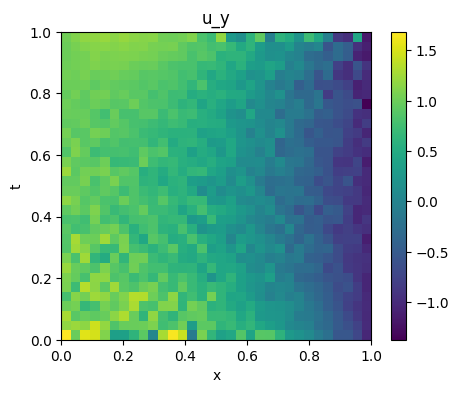

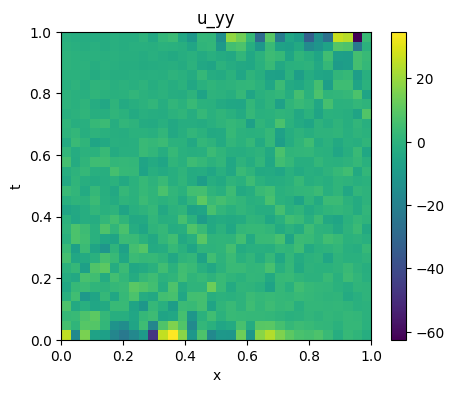

In [24]:
u_y = np.gradient(u, dy, axis=0, edge_order=2)# по y
u_yy = np.gradient(u_y, dy, axis=0, edge_order=2)# по yy

plt.figure(figsize=(5, 4))
plt.imshow(u_y, aspect='auto', extent=[0,1,0, 1], cmap='viridis')
plt.colorbar()
plt.title('u_y')
plt.xlabel('x')
plt.ylabel('t')
plt.show()

plt.figure(figsize=(5, 4))
plt.imshow(u_yy, aspect='auto', extent=[0,1,0, 1], cmap='viridis')
plt.colorbar()
plt.title('u_yy')
plt.xlabel('x')
plt.ylabel('t')
plt.show()


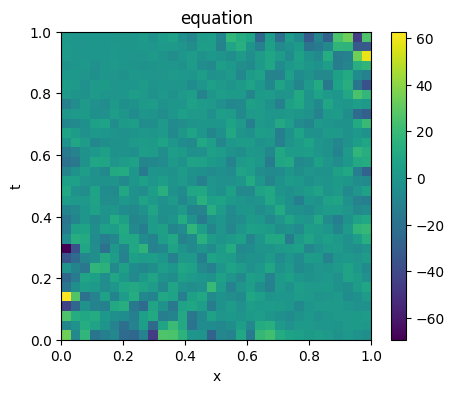

In [25]:
#проверка
u1 = u_xx + u_yy

plt.figure(figsize=(5, 4))
plt.imshow(u1, aspect='auto', extent=[0,1,0, 1], cmap='viridis')
plt.colorbar()
plt.title('equation')
plt.xlabel('x')
plt.ylabel('t')
plt.show()

In [26]:
np.save('data_laplace_noise0.01.npy', u)